In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (15,10)

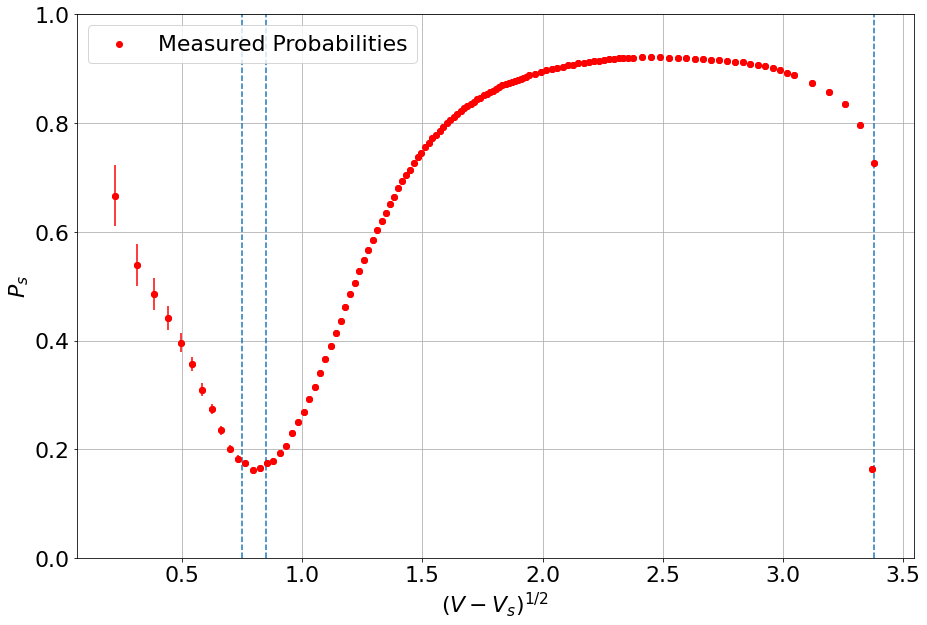

In [4]:
#Notation: Va: v accelarator, Vp: v plate, etc, Iis/Iip etc: the measurements under LN2
Va, Vp, Vs, Vip, Vis =np.loadtxt("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Ramsauer Lab\\Ram v1.csv",delimiter=',',\
                                 unpack=True,skiprows=2,usecols=(0,1,2,3,4))
Is=Vs/(1e+5)
Ip=Vp/(1e+7)
Iis=Vis/(1e+5)
Iip=Vip/(1e+7)
#Original plot
plt.scatter(np.sqrt((Va/1000)-(Vs/1000)),1-((Ip*Iis)/(Is*Iip)),color='r')
#All measurements were recorded in mV hence the factor of 1e-3
#Two sets of errorbars as two different uncertainties(mm settings changed)
plt.errorbar(np.sqrt((Va[0:77]/1000)-(Vs[0:77]/1000)),1-((Ip[0:77]*Iis[0:77])/(Is[0:77]*Iip[0:77])),\
             yerr=((Ip[0:77]*Iis[0:77])/(Is[0:77]*Iip[0:77]))*(5e-7)*np.sqrt((100*Ip[0:77])**(-2)+Iis[0:77]**(-2)+Is[0:77]**2+(Iip[0:77]/100)**2),\
             fmt='o',color='red')
plt.errorbar(np.sqrt((Va[78:133]/1000)-(Vs[78:133]/1000)),1-((Ip[78:133]*Iis[78:133])/(Is[78:133]*Iip[78:133])),\
             yerr=((Ip[78:133]*Iis[78:133])/(Is[78:133]*Iip[78:133]))*(5e-6)*np.sqrt((100*Ip[78:133])**(-2)+Iis[78:133]**(-2)+Is[78:133]**2+(Iip[78:133]/100)**2),\
             fmt='o',color='red')
plt.ylim(0,1)
plt.grid(True)
plt.xlabel('$(V-V_s)^{1/2}$')
plt.ylabel('$P_s$')
plt.vlines(x=[0.75,0.85,3.38],ymin=0,ymax=1,linestyles='dashed')
plt.legend(['Measured Probabilities'])


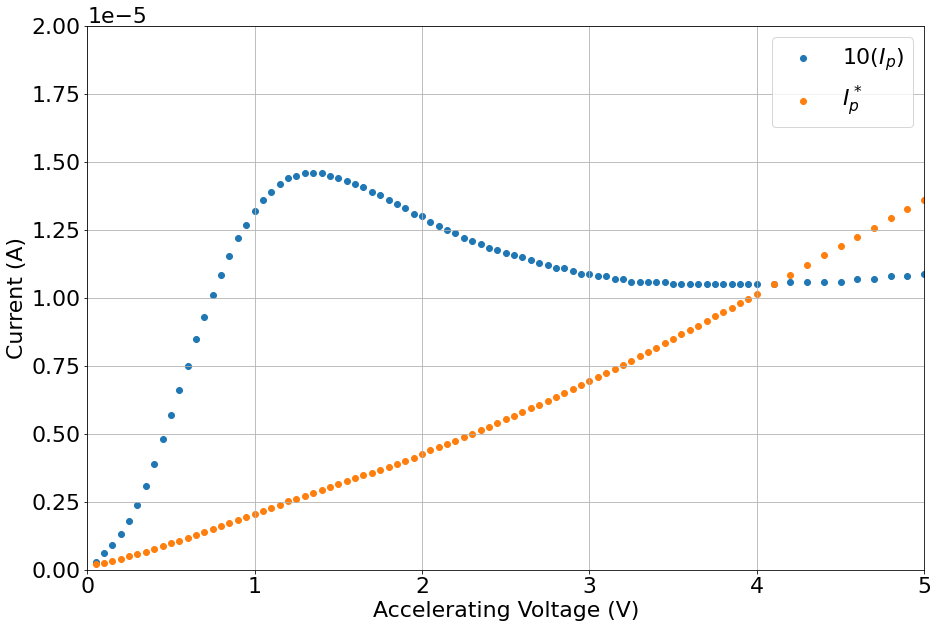

In [5]:
#Plot of Ip in both conditions
plt.scatter(Va/1000,10*Ip)
plt.xlim(0,5)
plt.ylim(0,2e-5)
plt.scatter(Va/1000,Iip)
plt.xlabel('Accelerating Voltage (V)')
plt.ylabel('Current (A)')
plt.legend(['$10(I_p)$','$I_p^*$'])
plt.grid(True)

In [6]:
#Used for linear fits
def linfunc(x,m,c):
    return m*x+c


In [7]:
#e suffix as the extension measurements
Vae,Vse = np.loadtxt("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Ramsauer Lab\\Ramsauer Ext.csv",delimiter=',',unpack=True,skiprows=1)
Ise=Vse/(1e+7)
space1=np.linspace(-0.4,0,100)
print(Ise)



[3.4e-07 2.6e-07 1.8e-07 1.3e-07 8.0e-08 5.0e-08 3.0e-08 1.0e-09 0.0e+00]


6.235779988437406 9.724343717789651 -14.864400162164646 -14.386416566821179
[[2.39897313 0.53405058]
 [0.53405058 0.1214394 ]]


<ipython-input-8-e44fba2440e1>:3: RuntimeWarning: divide by zero encountered in log
  plt.scatter(Vae/1000-Vse/1000,np.log(Ise))


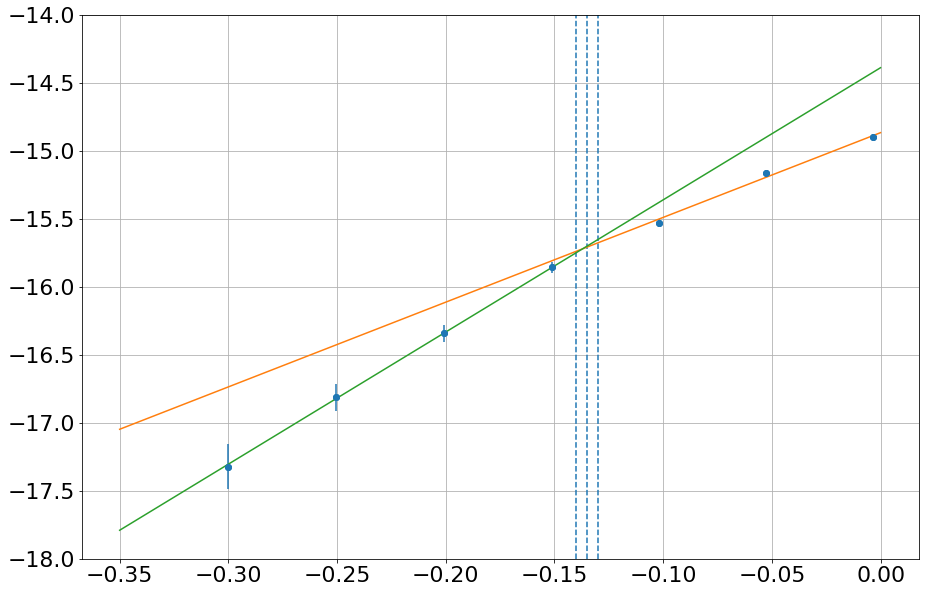

In [8]:
#This likely would read better with multiple variables rather than directly into the functions
#Plot used to determine contact potential and vbar
plt.scatter(Vae/1000-Vse/1000,np.log(Ise))
plt.errorbar(Vae[0:7]/1000-Vse[0:7]/1000,np.log(Ise[0:7]),yerr=(0.05)/Vse[0:7],fmt='o')
plt.grid(True,which='both')
#The two linear fits
popt1, pcov1 =curve_fit(linfunc,Vae[0:3]/1000-Vse[0:3]/1000,np.log(Ise[0:3]),\
                        sigma=(0.05)/Vse[0:3],absolute_sigma=True)
popt2, pcov2 =curve_fit(linfunc,Vae[4:7]/1000-Vse[4:7]/1000,np.log(Ise[4:7]),\
                        sigma=(0.05)/Vse[4:7],absolute_sigma=True)
space=np.linspace(-0.35,0,100)
plt.plot(space,popt1[0]*space+popt1[1])
plt.plot(space,popt2[0]*space+popt2[1])
plt.ylim(-18,-14)
print(popt1[0],popt2[0],popt1[1],popt2[1])
print(pcov2)
plt.vlines(x=[-0.135,-0.13,-0.14],ymin=-18,ymax=-14,linestyles='dashed')


#Point around 0.135V
#Vbar around 0.155 pm 0.025

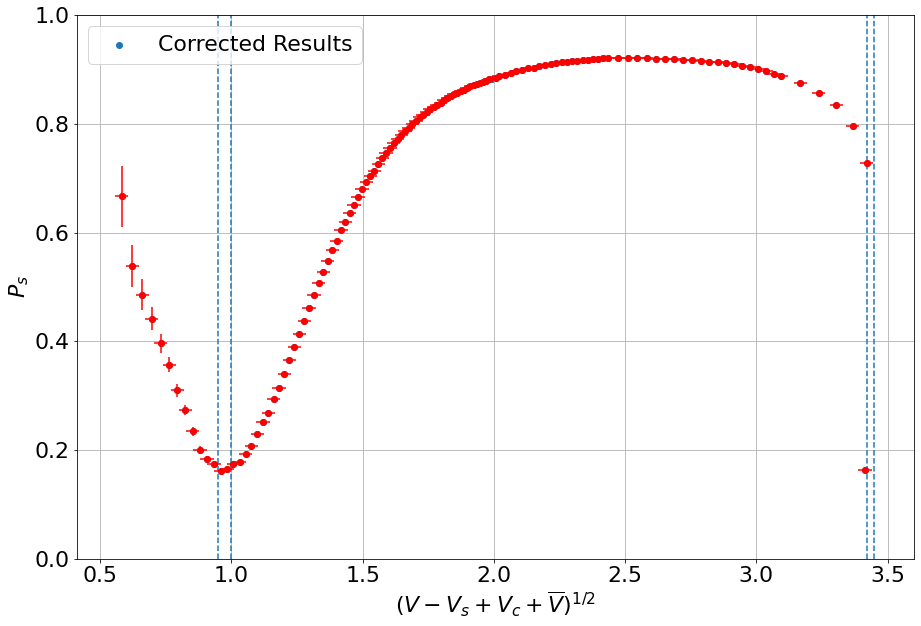

In [9]:
#Corrected plot
plt.scatter(np.sqrt((Va/1000+0.135+0.155)-(Vs/1000)),1-((Ip*Iis)/(Is*Iip)))
plt.ylim(0,1)
plt.grid(True)
plt.xlabel('$(V-V_s+V_c+\overline{V} )^{1/2}$')
plt.ylabel('$P_s$')
plt.vlines(x=[0.95,1,3.4223,3.45],ymin=0,ymax=1,linestyles='dashed')
plt.errorbar(np.sqrt((Va[0:77]/1000+0.135+0.155)-(Vs[0:77]/1000)),\
             1-((Ip[0:77]*Iis[0:77])/(Is[0:77]*Iip[0:77])),\
             xerr=0.0255,yerr=((Ip[0:77]*Iis[0:77])/(Is[0:77]*Iip[0:77]))*(5e-7)*np.sqrt((100*Ip[0:77])**(-2)+Iis[0:77]**(-2)+Is[0:77]**2+(Iip[0:77]/100)**2),\
             fmt='o',color='red')
plt.errorbar(np.sqrt((Va[78:133]/1000+0.135+0.155)-(Vs[78:133]/1000)),1-((Ip[78:133]*Iis[78:133])/(Is[78:133]*Iip[78:133])),\
             xerr=0.0255,\
             yerr=((Ip[78:133]*Iis[78:133])/(Is[78:133]*Iip[78:133]))*(5e-6)*np.sqrt((100*Ip[78:133])**(-2)+Iis[78:133]**(-2)+Is[78:133]**2+(Iip[78:133]/100)**2),\
             fmt='o',color='red')
plt.legend(['Corrected Results'])

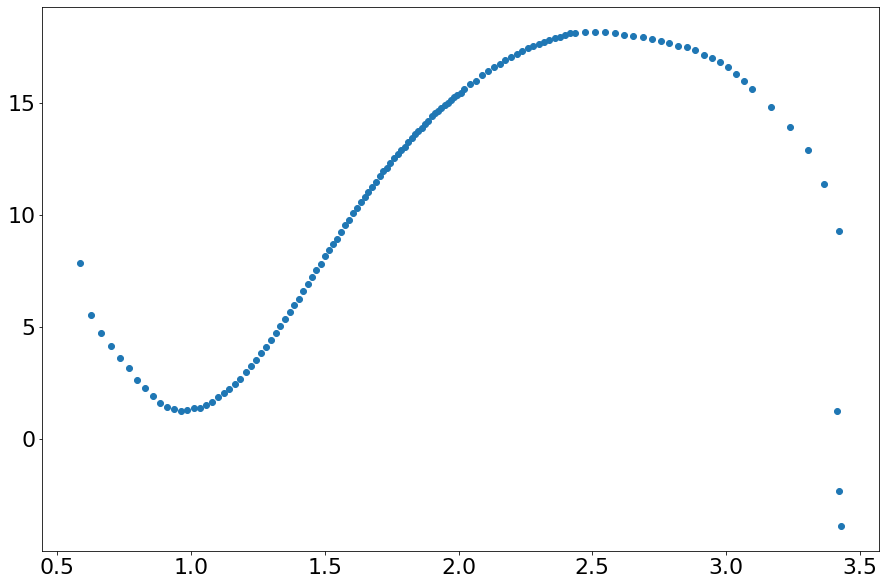

In [10]:
plt.scatter(np.sqrt((Va/1000+0.16+0.135)-(Vs/1000)),(-0.05/(0.7e-2))*np.log((Ip*Iis)/(Is*Iip)))
